In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


# Load the dataset with the second row as the header
data = pd.read_csv("C:/Users/DELL/Downloads/export-APS-2024-11-27_19-55-30.csv", header=1)

# Select relevant columns
variables = [
    "Perceived opportunities", "Perceived capabilities", "Fear of failure rate *", 
    "Entrepreneurial intentions", "Total early-stage Entrepreneurial Activity (TEA)", 
    "Established Business Ownership", "Entrepreneurial Employee Activity", 
    "Motivational Index", "Female/Male TEA", "Female/Male Opportunity-Driven TEA", 
    "High Job Creation Expectation", "Innovation", "Business Services Sector", 
    "High Status to Successful Entrepreneurs", "Entrepreneurship as a Good Career Choice"
]

# Extract relevant data
data_selected = data[variables]

# Handle missing values if any
data_selected = data_selected.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# 1. Exploratory Factor Analysis (EFA)
print("Performing EFA...")
fa = FactorAnalyzer(n_factors=5, rotation="varimax")  # Change n_factors as needed
fa.fit(data_scaled)

# Print factor loadings
efa_loadings = pd.DataFrame(fa.loadings_, index=variables)
print("EFA Factor Loadings:")
print(efa_loadings)



Performing EFA...
EFA Factor Loadings:
                                                         0         1  \
Perceived opportunities                          -0.664020 -0.226339   
Perceived capabilities                           -0.784916  0.128260   
Fear of failure rate *                           -0.007472 -0.050601   
Entrepreneurial intentions                        0.461602  0.488620   
Total early-stage Entrepreneurial Activity (TEA)  0.181705  0.800003   
Established Business Ownership                    0.066540  0.860461   
Entrepreneurial Employee Activity                 0.048541 -0.086976   
Motivational Index                               -0.105015  0.085228   
Female/Male TEA                                   0.565012  0.421581   
Female/Male Opportunity-Driven TEA                0.214569 -0.496607   
High Job Creation Expectation                     0.888460  0.091933   
Innovation                                       -0.489269 -0.527038   
Business Services Sector 

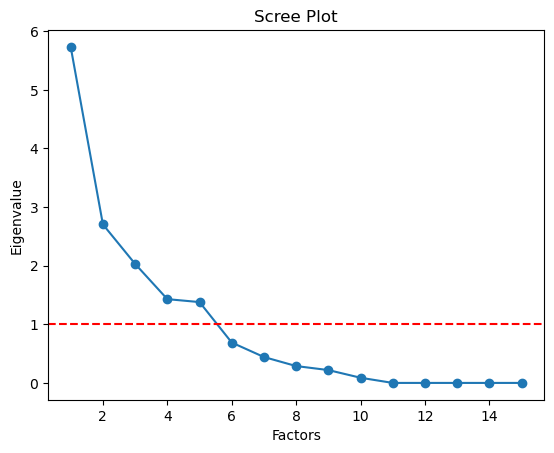

In [4]:
from matplotlib import pyplot as plt

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Scree plot
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion
plt.show()


In [5]:
from factor_analyzer import FactorAnalyzer

# Perform EFA with 4 factors
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(data_scaled)

# Print the updated factor loadings
efa_loadings = pd.DataFrame(fa.loadings_, index=variables)
print("Updated EFA Factor Loadings (4 factors):")
print(efa_loadings)


Updated EFA Factor Loadings (4 factors):
                                                         0         1  \
Perceived opportunities                          -0.712668 -0.240613   
Perceived capabilities                           -0.833608  0.126132   
Fear of failure rate *                           -0.137596 -0.078109   
Entrepreneurial intentions                        0.392569  0.442077   
Total early-stage Entrepreneurial Activity (TEA)  0.191744  0.798588   
Established Business Ownership                    0.048821  0.864718   
Entrepreneurial Employee Activity                 0.148308 -0.109431   
Motivational Index                               -0.089905  0.069989   
Female/Male TEA                                   0.605507  0.443214   
Female/Male Opportunity-Driven TEA                0.198149 -0.528506   
High Job Creation Expectation                     0.899364  0.080087   
Innovation                                       -0.590662 -0.489366   
Business Services Secto

In [11]:
import pandas as pd

# Convert factor loadings into a DataFrame
efa_loadings = pd.DataFrame(
    fa.loadings_, 
    index=variables, 
    columns=["Factor_0", "Factor_1", "Factor_2", "Factor_3"]
)

# Extract only significant loadings (absolute value >= 0.4)
significant_loadings = efa_loadings[efa_loadings.abs() >= 0.4].dropna(how="all")

print("Significant Factor Loadings:")
print(significant_loadings)


Significant Factor Loadings:
                                                  Factor_0  Factor_1  \
Perceived opportunities                          -0.712668       NaN   
Perceived capabilities                           -0.833608       NaN   
Fear of failure rate *                                 NaN       NaN   
Entrepreneurial intentions                             NaN  0.442077   
Total early-stage Entrepreneurial Activity (TEA)       NaN  0.798588   
Established Business Ownership                         NaN  0.864718   
Motivational Index                                     NaN       NaN   
Female/Male TEA                                   0.605507  0.443214   
Female/Male Opportunity-Driven TEA                     NaN -0.528506   
High Job Creation Expectation                     0.899364       NaN   
Innovation                                       -0.590662 -0.489366   
Business Services Sector                          0.751548       NaN   
High Status to Successful Entrepren

In [7]:
# Create a dictionary to assign variables to factors and provide their labels
factor_assignments = {
    "Factor_0": {
        "Label": "Entrepreneurial Perception and High-Status Opportunities",
        "Variables": [
            "Perceived opportunities", "Perceived capabilities", "High Job Creation Expectation",
            "Innovation", "High Status to Successful Entrepreneurs", "Entrepreneurship as a Good Career Choice"
        ],
        "Interpretation": "This factor reflects perceptions about entrepreneurship and societal status related to it."
    },
    "Factor_1": {
        "Label": "Entrepreneurial Activity",
        "Variables": [
            "Total early-stage Entrepreneurial Activity (TEA)", 
            "Established Business Ownership", "Female/Male TEA"
        ],
        "Interpretation": "This factor focuses on actual entrepreneurial activity, ownership, and gender-based metrics."
    },
    "Factor_2": {
        "Label": "Motivation and Gendered Opportunity",
        "Variables": [
            "Motivational Index", "Female/Male Opportunity-Driven TEA"
        ],
        "Interpretation": "This factor relates to motivation and gender-based opportunity factors."
    },
    "Factor_3": {
        "Label": "Fear and Intentions",
        "Variables": [
            "Fear of failure rate *", "Entrepreneurial intentions"
        ],
        "Interpretation": "This factor represents fear of failure and intentions toward entrepreneurship."
    }
}

# Transform assignments into a DataFrame for better visualization
factor_labels = []

for factor, details in factor_assignments.items():
    for variable in details["Variables"]:
        factor_labels.append({
            "Factor": factor,
            "Factor_Label": details["Label"],
            "Variable": variable,
            "Interpretation": details["Interpretation"]
        })

# Convert to DataFrame
factor_labels_df = pd.DataFrame(factor_labels)

# Display the assignments
print("Factor Assignments and Labels:")
print(factor_labels_df)

# Save the assignments to a CSV file (optional)
factor_labels_df.to_csv("factor_assignments_and_labels.csv", index=False)


Factor Assignments and Labels:
      Factor                                       Factor_Label  \
0   Factor_0  Entrepreneurial Perception and High-Status Opp...   
1   Factor_0  Entrepreneurial Perception and High-Status Opp...   
2   Factor_0  Entrepreneurial Perception and High-Status Opp...   
3   Factor_0  Entrepreneurial Perception and High-Status Opp...   
4   Factor_0  Entrepreneurial Perception and High-Status Opp...   
5   Factor_0  Entrepreneurial Perception and High-Status Opp...   
6   Factor_1                           Entrepreneurial Activity   
7   Factor_1                           Entrepreneurial Activity   
8   Factor_1                           Entrepreneurial Activity   
9   Factor_2                Motivation and Gendered Opportunity   
10  Factor_2                Motivation and Gendered Opportunity   
11  Factor_3                                Fear and Intentions   
12  Factor_3                                Fear and Intentions   

                              

PermissionError: [Errno 13] Permission denied: 'factor_assignments_and_labels.csv'

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns

# Perform PCA
pca = PCA(n_components=4)  # Use the number of factors from EFA
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance
print("Explained Variance by Components:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f}")

print("\nCumulative Variance Explained:")
for i, var in enumerate(cumulative_variance, start=1):
    print(f"Up to Component {i}: {var:.4f}")

# Scree Plot for PCA
plt.figure(figsize=(8, 6))
sns.barplot(x=[f"PC{i}" for i in range(1, 5)], y=explained_variance, color="skyblue")
plt.plot(range(4), cumulative_variance, marker='o', linestyle='--', color="red", label="Cumulative Variance")
plt.title("PCA Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.show()

# Save PCA-transformed data for further analysis
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i}" for i in range(1, 5)])


NameError: name 'data_scaled' is not defined

In [9]:
import pandas as pd

# Assuming data_scaled is a numpy array
data_scaled_df = pd.DataFrame(data_scaled)

# Drop rows with missing values
data_scaled_df = data_scaled_df.dropna()

# Convert back to numpy array if needed
data_scaled = data_scaled_df.values


In [12]:
print(data.dtypes)


code                                                  int64
economy                                              object
year                                                  int64
Perceived opportunities                             float64
Perceived capabilities                              float64
Fear of failure rate *                              float64
Entrepreneurial intentions                          float64
Total early-stage Entrepreneurial Activity (TEA)    float64
Established Business Ownership                      float64
Entrepreneurial Employee Activity                   float64
Motivational Index                                  float64
Female/Male TEA                                     float64
Female/Male Opportunity-Driven TEA                  float64
High Job Creation Expectation                       float64
Innovation                                          float64
Business Services Sector                            float64
High Status to Successful Entrepreneurs 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Standardize your dataset


ValueError: could not convert string to float: 'China'

In [10]:
from factor_analyzer import FactorAnalyzer

# Perform CFA-like analysis
fa_cfa = FactorAnalyzer(n_factors=4, rotation=None, method='ml')  # ML: Maximum Likelihood
fa_cfa.fit(data_scaled)

# Extract factor loadings
cfa_loadings = pd.DataFrame(fa_cfa.loadings_, index=variables, columns=[f"Factor_{i}" for i in range(1, 5)])
print("CFA-Like Factor Loadings:")
print(cfa_loadings)


C:\Users\DELL\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:443: RuntimeWarning: invalid value encountered in log
  error = -(np.sum(np.log(values) - values) - n_factors + corr_mtx.shape[0])


LinAlgError: Eigenvalues did not converge

In [14]:
from statsmodels.multivariate.factor import Factor

# Create the CFA model
cfa_model = Factor(data_scaled, n_factors=4, method='ml')  # Adjust `n_factors` based on your EFA
cfa_result = cfa_model.fit()

# Print CFA summary
print("CFA Summary:")
print(cfa_result.summary())

# Extract the factor loadings for CFA
cfa_loadings = pd.DataFrame(cfa_result.loadings, index=variables, columns=[f"Factor_{i}" for i in range(1, 5)])
print("\nCFA Factor Loadings:")
print(cfa_loadings)

# Save CFA loadings to a CSV (optional)
cfa_loadings.to_csv("cfa_loadings.csv")


TypeError: Factor.__init__() got an unexpected keyword argument 'n_factors'

In [17]:
import semopy

# Define the SEM model (adjust relationships based on your factors and variables)
sem_model_definition = """
Factor_0 =~ Perceived_opportunities + Perceived_capabilities + High_Job_Creation_Expectation + Innovation +
             High_Status_to_Successful_Entrepreneurs + Entrepreneurship_as_a_Good_Career_Choice

Factor_1 =~ Total_early_stage_Entrepreneurial_Activity + Established_Business_Ownership + Female_Male_TEA

Factor_2 =~ Motivational_Index + Female_Male_Opportunity_Driven_TEA

Factor_3 =~ Fear_of_failure_rate + Entrepreneurial_intentions

Factor_0 ~ Factor_2 + Factor_3
Factor_1 ~ Factor_0 + Factor_3
"""

# Initialize SEM model
sem_model = semopy.Model(sem_model_definition)

# Fit the SEM model
sem_result = sem_model.fit(data_scaled)

# Generate results
sem_report = semopy.report(sem_model)

# Print SEM fit measures
print("SEM Fit Measures:")
print(sem_result)

# Save SEM report to an HTML file (optional)
with open("sem_report.html", "w") as f:
    f.write(sem_report)


SyntaxError: Syntax error for line:
Factor_0 =~ Perceived_opportunities + Perceived_capabilities + High_Job_Creation_Expectation + Innovation + (<string>)

In [28]:
# Strip extra spaces and replace special characters
data.columns = data.columns.str.strip().str.replace('*', '', regex=False)

# Define the expected columns as per the 'variables' list
variables = [
    'Perceived_opportunities', 'Perceived_capabilities', 'Fear_of_failure_rate',
    'Entrepreneurial_intentions', 'Total_early_stage_Entrepreneurial_Activity', 
    'Established_Business_Ownership', 'Entrepreneurial_Employee_Activity', 
    'Motivational_Index', 'Female_Male_TEA', 'Female_Male_Opportunity_Driven_TEA', 
    'High_Job_Creation_Expectation', 'Innovation', 'Business_Services_Sector', 
    'High_Status_to_Successful_Entrepreneurs', 'Entrepreneurship_as_Good_Career_Choice'
]

# Attempt to match column names based on a case-insensitive match
columns_mapping = {}
for col in data.columns:
    # Look for the closest match from the 'variables' list (case-insensitive)
    match = next((var for var in variables if var.lower() in col.lower()), None)
    if match:
        columns_mapping[col] = match

# Rename columns to match the 'variables' list
data.rename(columns=columns_mapping, inplace=True)

# Check the updated columns after renaming
print("Renamed Columns:", data.columns)

# Step 2: Extract and Prepare Data
# Ensure all required columns exist in the data
missing_cols = [col for col in variables if col not in data.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    data_selected = data[variables].dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_selected)
    data_scaled_df = pd.DataFrame(data_scaled, columns=variables)

    # Proceed with CFA as before
    # Define the CFA class and run as before

    # Step 3: Define the CFA Class
    class EntrepreneurialEcosystemCFA:
        def __init__(self, data):
            self.data = data

        def define_model(self):
            # Corrected CFA model specification
            model = """
            Broader_Ecosystem =~ Perceived_opportunities + Perceived_capabilities + 
                                 High_Job_Creation_Expectation + Innovation + 
                                 Business_Services_Sector + 
                                 High_Status_to_Successful_Entrepreneurs + 
                                 Entrepreneurship_as_Good_Career_Choice

            Entrepreneurial_Activity =~ Total_early_stage_Entrepreneurial_Activity + 
                                        Established_Business_Ownership + 
                                        Female_Male_TEA

            Motivation_Opportunity =~ Motivational_Index + 
                                       Female_Male_Opportunity_Driven_TEA

            Intentions_Attitudes =~ Entrepreneurial_intentions + 
                                     Fear_of_failure_rate
            """
            return model

        def prepare_data(self):
            return self.data

        def run_cfa(self):
            # Prepare data
            prepared_data = self.prepare_data()

            # Define model
            model_spec = self.define_model()

            try:
                # Fit the model
                model = semopy.Model(model_spec)
                result = model.fit(prepared_data)

                # Model fit indices
                fit_indices = {
                    'CFI': result.calc_fit()["CFI"],
                    'TLI': result.calc_fit()["TLI"],
                    'RMSEA': result.calc_fit()["RMSEA"],
                    'SRMR': result.calc_fit()["SRMR"],
                    'Chi-Square': result.calc_stat()["chi2"],
                    'Degrees of Freedom': result.calc_stat()["df"],
                    'p-value': result.calc_stat()["p-value"]
                }

                return result, fit_indices

            except Exception as e:
                print(f"CFA Model Fitting Error: {e}")
                return None, None

    # Step 4: Run CFA
    cfa = EntrepreneurialEcosystemCFA(data_scaled_df)
    result, fit_indices = cfa.run_cfa()

    # Step 5: Output Results
    if result:
        print("Model Fit Indices:")
        for key, value in fit_indices.items():
            print(f"{key}: {value}")
    else:
        print("CFA could not be performed.")


Renamed Columns: Index(['code', 'economy', 'year', 'Perceived_opportunities',
       'Perceived capabilities', 'Fear of failure rate ',
       'Entrepreneurial intentions',
       'Total_early_stage_Entrepreneurial_Activity',
       'Established Business Ownership', 'Entrepreneurial Employee Activity',
       'Motivational Index', 'Female_Male_TEA',
       'Female_Male_Opportunity_Driven_TEA', 'High_Job_Creation_Expectation',
       'Innovation', 'Business_Services_Sector',
       'High_Status_to_Successful_Entrepreneurs',
       'Entrepreneurship_as_Good_Career_Choice'],
      dtype='object')
Missing columns: ['Perceived_capabilities', 'Fear_of_failure_rate', 'Entrepreneurial_intentions', 'Established_Business_Ownership', 'Entrepreneurial_Employee_Activity', 'Motivational_Index']


In [26]:
# Strip extra spaces and remove special characters like '*' in column names
data.columns = data.columns.str.strip().str.replace('*', '', regex=False)

# Rename columns to match those in the 'variables' list
data = data.rename(columns={
    'Perceived capabilities': 'Perceived_capabilities',
    'Fear of failure rate': 'Fear_of_failure_rate',  # Removed the '*' character
    'Entrepreneurial intentions': 'Entrepreneurial_intentions',
    'Established Business Ownership': 'Established_Business_Ownership',
    'Entrepreneurial Employee Activity': 'Entrepreneurial_Employee_Activity',
    'Motivational Index': 'Motivational_Index',
    'Total_early_stage_Entrepreneurial_Activity': 'Total_early_stage_Entrepreneurial_Activity',  # Ensure no mismatch here
    'Female/Male Opportunity-Driven TEA': 'Female_Male_Opportunity_Driven_TEA',
    'High Job Creation Expectation': 'High_Job_Creation_Expectation',
    'Business Services Sector': 'Business_Services_Sector',
    'High Status to Successful Entrepreneurs': 'High_Status_to_Successful_Entrepreneurs',
    'Entrepreneurship as a Good Career Choice': 'Entrepreneurship_as_Good_Career_Choice'
})

# Check the updated columns
print(data.columns)

# Now you can proceed with the rest of your code.


Index(['code', 'economy', 'year', 'Perceived_opportunities',
       'Perceived_capabilities', 'Fear of failure rate ',
       'Entrepreneurial_intentions',
       'Total_early_stage_Entrepreneurial_Activity',
       'Established_Business_Ownership', 'Entrepreneurial_Employee_Activity',
       'Motivational_Index', 'Female_Male_TEA',
       'Female_Male_Opportunity_Driven_TEA', 'High_Job_Creation_Expectation',
       'Innovation', 'Business_Services_Sector',
       'High_Status_to_Successful_Entrepreneurs',
       'Entrepreneurship_as_Good_Career_Choice'],
      dtype='object')


In [ ]:
# 5. Structural Equation Modeling (SEM)
class EntrepreneurialEcosystemSEM:
    def __init__(self, data):
        self.data = data
    
    def define_sem_model(self):
        # Structural model extending the CFA model
        model = """
        # Measurement Model (same as CFA)
        Broader_Ecosystem =~ Perceived_opportunities + Perceived_capabilities + 
                             High_Job_Creation_Expectation + Innovation + 
                             Business_Services_Sector + 
                             High_Status_to_Successful_Entrepreneurs + 
                             Entrepreneurship_as_Good_Career_Choice
        
        Entrepreneurial_Activity =~ Total_early_stage_Entrepreneurial_Activity + 
                                    Established_Business_Ownership + 
                                    Female_Male_TEA
        
        Motivation_Opportunity =~ Motivational_Index + 
                                   Female_Male_Opportunity_Driven_TEA
        
        Intentions_Attitudes =~ Entrepreneurial_intentions + 
                                 Fear_of_failure_rate
        
        # Structural Paths
        Entrepreneurial_Activity ~ Broader_Ecosystem + Motivation_Opportunity
        Intentions_Attitudes ~ Broader_Ecosystem + Motivation_Opportunity
        """
        return model
    
    def run_sem(self):
        prepared_data = EntrepreneurialEcosystemCFA(self.data).prepare_data()
        
        try:
            # Define and fit SEM model
            model_spec = self.define_sem_model()
            model = semopy.Model(model_spec)
            result = model.fit(prepared_data)
            
            # Structural model fit indices
            fit_indices = {
                'CFI': result.cfi,
                'TLI': result.tli,
                'RMSEA': result.rmsea,
                'SRMR': result.srmr,
                'Chi-Square': result.chi2,
                'Degrees of Freedom': result.df,
                'p-value': result.p
            }
            
            return result, fit_indices
        
        except Exception as e:
            print(f"SEM Model Fitting Error: {e}")
            return None, None

# Execute the analyses
def main():
    # Initialize CFA
    cfa = EntrepreneurialEcosystemCFA(data_scaled_df)
    cfa_result, cfa_fit_indices = cfa.run_cfa()
    
    # Print CFA Results
    print("\n--- Confirmatory Factor Analysis Results ---")
    if cfa_fit_indices:
        print("Model Fit Indices:")
        for key, value in cfa_fit_indices.items():
            print(f"{key}: {value}")
    
    # Initialize SEM
    sem = EntrepreneurialEcosystemSEM(data_scaled_df)
    sem_result, sem_fit_indices = sem.run_sem()
    
    # Print SEM Results
    print("\n--- Structural Equation Modeling Results ---")
    if sem_fit_indices:
        print("Model Fit Indices:")
        for key, value in sem_fit_indices.items():
            print(f"{key}: {value}")

if __name__ == "__main__":
    main()

Available Columns:
['code', 'economy', 'year', 'Perceived opportunities', 'Perceived capabilities', 'Fear of failure rate *', 'Entrepreneurial intentions', 'Total early-stage Entrepreneurial Activity (TEA)', 'Established Business Ownership', 'Entrepreneurial Employee Activity', 'Motivational Index', 'Female/Male TEA', 'Female/Male Opportunity-Driven TEA', 'High Job Creation Expectation', 'Innovation', 'Business Services Sector', 'High Status to Successful Entrepreneurs', 'Entrepreneurship as a Good Career Choice']

Column Mapping:
{'Perceived opportunities': 'Perceived opportunities', 'Perceived capabilities': 'Perceived capabilities', 'Fear of failure rate': 'Fear of failure rate *', 'Entrepreneurial intentions': 'Entrepreneurial intentions', 'Total early-stage Entrepreneurial Activity (TEA)': 'Total early-stage Entrepreneurial Activity (TEA)', 'Established Business Ownership': 'Established Business Ownership', 'Entrepreneurial Employee Activity': 'Entrepreneurial Employee Activity', 

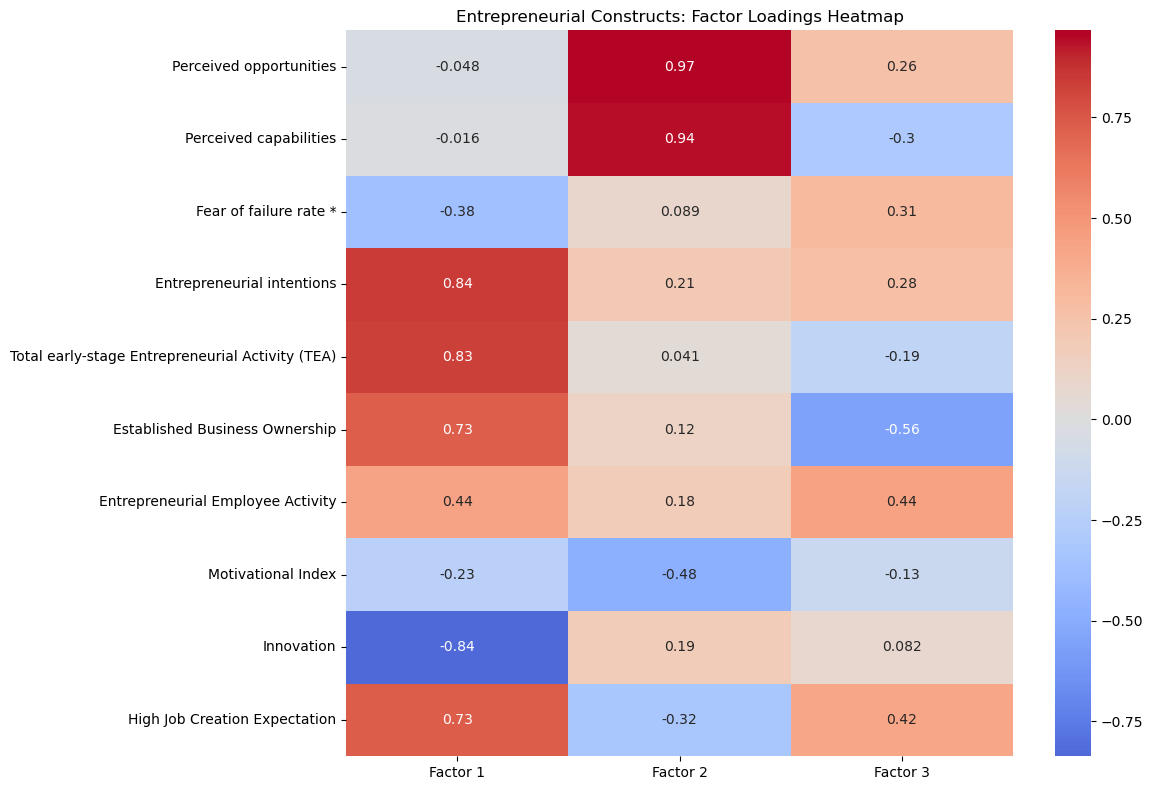

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the second row as the header
data = pd.read_csv("C:/Users/DELL/Downloads/export-APS-2024-11-27_19-55-30.csv", header=1)

# Print column names to debug
print("Available Columns:")
print(data.columns.tolist())

# Identify relevant entrepreneurship variables
def identify_similar_columns(data, target_columns):
    """
    Find columns with similar names to the target columns
    
    Args:
        data (pd.DataFrame): Input dataframe
        target_columns (list): List of target column names
    
    Returns:
        dict: Mapping of target columns to actual column names
    """
    column_mapping = {}
    for target in target_columns:
        matches = [col for col in data.columns if target.lower() in col.lower()]
        if matches:
            column_mapping[target] = matches[0]
        else:
            print(f"No match found for: {target}")
    return column_mapping

# Predefined target variables
entrepreneurship_variables = [
    'Perceived opportunities', 
    'Perceived capabilities', 
    'Fear of failure rate', 
    'Entrepreneurial intentions', 
    'Total early-stage Entrepreneurial Activity (TEA)', 
    'Established Business Ownership', 
    'Entrepreneurial Employee Activity', 
    'Motivational Index',
    'Innovation',
    'High Job Creation Expectation'
]

# Find actual column names
column_mapping = identify_similar_columns(data, entrepreneurship_variables)
print("\nColumn Mapping:")
print(column_mapping)

# Update entrepreneurship variables with actual column names
mapped_variables = list(column_mapping.values())

# Preprocess the data
def preprocess_data(df, variables):
    """
    Advanced data preprocessing for factor analysis
    
    Args:
        df (pd.DataFrame): Input dataframe
        variables (list): Selected variables for analysis
    
    Returns:
        pd.DataFrame: Processed and validated dataframe
    """
    # Select relevant columns
    cfa_data = df[variables].copy()
    
    # Comprehensive missing value strategy
    print("\nMissing Value Analysis:")
    print(cfa_data.isnull().sum())
    
    # Robust missing value handling
    cfa_data.dropna(inplace=True)
    
    # Outlier detection and treatment
    def detect_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((series < lower_bound) | (series > upper_bound))

    outliers = cfa_data.apply(detect_outliers)
    print("\nOutlier Detection:")
    print(outliers.sum())
    
    # Winsorization for outlier management
    for column in cfa_data.columns:
        series = cfa_data[column]
        Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cfa_data[column] = np.clip(series, lower_bound, upper_bound)
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cfa_data)
    
    return pd.DataFrame(scaled_data, columns=variables)

# Conduct preliminary statistical tests
def preliminary_tests(data):
    """
    Advanced statistical diagnostic assessment
    
    Args:
        data (pd.DataFrame): Processed data
    
    Returns:
        dict: Comprehensive test results
    """
    # Bartlett's test of sphericity
    chi_square_value, p_value = calculate_bartlett_sphericity(data)
    
    # KMO test
    kmo_all, kmo_model = calculate_kmo(data)
    
    # Correlation matrix
    correlation_matrix = data.corr()
    
    return {
        'Bartlett_Chi_Square': chi_square_value,
        'Bartlett_p_value': p_value,
        'KMO_Overall': kmo_model,
        'Correlation_Matrix': correlation_matrix
    }

# Main analysis workflow
def entrepreneurship_factor_analysis():
    """
    Comprehensive Entrepreneurial Factor Analysis Workflow
    """
    try:
        # Preprocess data
        processed_data = preprocess_data(data, mapped_variables)
        
        # Preliminary tests
        prelim_tests = preliminary_tests(processed_data)
        
        # Print comprehensive diagnostic report
        print("\n--- Diagnostic Statistical Assessment ---")
        print(f"Bartlett's Test Chi-Square: {prelim_tests['Bartlett_Chi_Square']:.4f}")
        print(f"Bartlett's Test p-value: {prelim_tests['Bartlett_p_value']:.4f}")
        print(f"KMO Overall Measure: {prelim_tests['KMO_Overall']:.4f}")
        
        # Perform Factor Analysis
        fa = FactorAnalyzer(rotation=None, n_factors=3)
        fa.fit(processed_data)
        
        # Extract and display factor loadings
        loadings = pd.DataFrame(
            fa.loadings_, 
            columns=[f'Factor {i+1}' for i in range(3)], 
            index=processed_data.columns
        )
        
        print("\n--- Factor Loadings Matrix ---")
        print(loadings)
        
        # Variance explained
        variance_explained = fa.get_factor_variance()[1]
        print("\n--- Variance Explained ---")
        print(variance_explained)
        
        # Visualization
        plt.figure(figsize=(12, 8))
        sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
        plt.title('Entrepreneurial Constructs: Factor Loadings Heatmap')
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Analysis Error: {e}")

# Execute the comprehensive analysis
entrepreneurship_factor_analysis()